In [42]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

#2020 population of Catalonia from https://www.idescat.cat/pub/?id=aec&n=245
popCatalunya = 7722203

#Catalonia's health department data https://dadescovid.cat/descarregues
resp = urlopen("https://dadescovid.cat/static/csv/catalunya_diari_total_pob.zip")
zipfile = ZipFile(BytesIO(resp.read()))
file = zipfile.namelist()[0]
df = pd.read_csv(zipfile.open(file), sep=";")
df.head()

,NOM,CODI,DATA,SEXE,GRUP_EDAT,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,...,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
0,CATALUNYA,GLOBAL,2021-01-25,Altres,NaN,59,87,33,0,0,...,30,0,9,50,6,2,85,33,3,1
1,CATALUNYA,GLOBAL,2021-01-25,Dona,Entre 15 i 64,834,979,6093,0,5,...,60,1,29,805,23,651,866,5589,1223,777
2,CATALUNYA,GLOBAL,2021-01-25,Dona,Entre 65 i 74,91,109,511,1,2,...,43,1,3,88,3,62,90,481,59,61
3,CATALUNYA,GLOBAL,2021-01-25,Dona,Majors de 74,100,194,803,0,3,...,30,1,14,86,13,73,172,650,437,766
4,CATALUNYA,GLOBAL,2021-01-25,Dona,Menors de 15,124,45,845,0,0,...,0,0,1,123,0,82,43,816,0,0


In [43]:
df["DATA"] = pd.to_datetime(df["DATA"])
dfagg = df.groupby("DATA").agg(sum)
dfagg.tail()

,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
DATA,,,,,,,,,,,,,,,,
2021-01-21,3517,51452,18408,285,52,2913,580,71,1661,1856,1766,1963,47365,17242,2962,1497
2021-01-22,3259,46069,18072,255,64,2848,594,85,1513,1746,1833,1872,42250,16888,4856,1826
2021-01-23,1429,16558,6471,161,52,2985,610,56,589,840,666,865,15239,6032,2468,1209
2021-01-24,994,6799,4268,127,29,3061,609,68,279,715,348,736,6102,4052,495,303
2021-01-25,2286,2404,13894,3,31,3009,612,5,106,2180,96,1649,2127,12889,2399,2074


In [44]:
dfaggvac = dfagg[dfagg["VACUNATS_DOSI_1"]>0]
dfaggvac.reset_index(inplace=True)
dfaggvac['Weekend'] = np.where(dfaggvac["DATA"].dt.weekday < 5,0,1)
dfaggvac["1st dose percent"] = dfaggvac["VACUNATS_DOSI_1"].cumsum()/popCatalunya*100
dfaggvac["2nd dose percent"] = dfaggvac["VACUNATS_DOSI_2"].cumsum()/popCatalunya*100

dfaggvac.head()

,DATA,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,INGRESSATS_TOTAL,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2,Weekend,1st dose percent,2nd dose percent
0,2020-12-27,1131,4998,4121,165,31,1757,321,42,404,727,331,573,4620,3896,803,0,1,0.010399,0.0
1,2020-12-28,4027,21849,19981,239,35,1803,335,47,1411,2616,1238,2377,19535,18550,1,0,0,0.010412,0.0
2,2020-12-29,3981,26494,19708,244,26,1820,335,44,1547,2434,1492,2299,23786,18178,445,0,0,0.016174,0.0
3,2020-12-30,3770,27693,19683,228,23,1805,328,47,1492,2278,1531,2232,24695,18454,2585,0,0,0.049649,0.0
4,2020-12-31,3406,22463,17184,222,40,1772,340,47,1445,1961,1627,2007,20126,16146,2591,0,0,0.083202,0.0


<IPython.core.display.Javascript object>


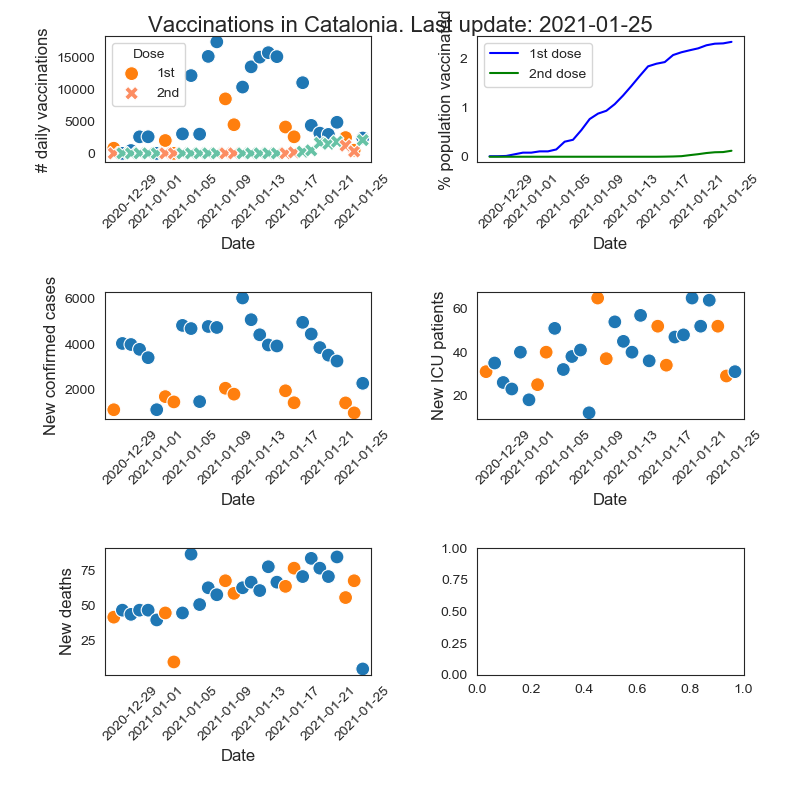

In [47]:
dmax = max(dfaggvac["DATA"]) + pd.DateOffset(1)
dmin = min(dfaggvac["DATA"]) - pd.DateOffset(1)
sns.set_style('white')


fig, axes = plt.subplots(3,2,figsize=(8,8))
fig.suptitle("Vaccinations in Catalonia. Last update: " + max(dfaggvac["DATA"]).strftime("%Y-%m-%d"), fontsize=16)

#sns.set(rc={'figure.figsize':(9,9)})

sns.scatterplot(ax= axes[0][0], data=dfaggvac, x="DATA", y="VACUNATS_DOSI_1", 
                hue="Weekend", s=100, label="1st dose", legend=False)
sns.scatterplot(ax= axes[0][0], data=dfaggvac, x="DATA", y="VACUNATS_DOSI_2", 
                hue="Weekend", palette="Set2", s=100, label="2nd dose", legend=False, marker="X")

axes[0][0].set_xlabel('Date', fontsize=12)
axes[0][0].set_ylabel('# daily vaccinations', fontsize=12)
axes[0][0].tick_params(axis='y')
axes[0][0].tick_params(axis="x",rotation=45)
axes[0][0].set_xlim(dmin, dmax)
#axes[0][0].legend([],[], frameon=False)
axes[0][0].legend(title='Dose', loc='upper left', labels=['1st', '2nd'])


sns.lineplot(ax= axes[0][1], x=dfaggvac["DATA"], y=dfaggvac["1st dose percent"], color="b", label="1st dose")
sns.lineplot(ax= axes[0][1], x=dfaggvac["DATA"], y=dfaggvac["2nd dose percent"], color="g", label="2nd dose")
axes[0][1].set_xlabel('Date', fontsize=12)
axes[0][1].set_ylabel('% population vaccinated', fontsize=12)
axes[0][1].tick_params(axis='y')
axes[0][1].tick_params(axis="x",rotation=45)

sns.scatterplot(ax= axes[1][0], data=dfaggvac, x="DATA", y="CASOS_CONFIRMAT", hue="Weekend", s=100)

axes[1][0].set_xlabel('Date', fontsize=12)
axes[1][0].set_ylabel('New confirmed cases', fontsize=12)
axes[1][0].tick_params(axis='y')
axes[1][0].tick_params(axis="x",rotation=45)
axes[1][0].set_xlim(dmin, dmax)
axes[1][0].legend([],[], frameon=False)

sns.scatterplot(ax= axes[1][1], data=dfaggvac, x="DATA", y="INGRESSOS_CRITIC", hue="Weekend", s=100)

axes[1][1].set_xlabel('Date', fontsize=12)
axes[1][1].set_ylabel('New ICU patients', fontsize=12)
axes[1][1].tick_params(axis='y')
axes[1][1].tick_params(axis="x",rotation=45)
axes[1][1].set_xlim(dmin, dmax)
axes[1][1].legend([],[], frameon=False)

sns.scatterplot(ax= axes[2][0], data=dfaggvac, x="DATA", y="EXITUS", hue="Weekend", s=100)

axes[2][0].set_xlabel('Date', fontsize=12)
axes[2][0].set_ylabel('New deaths', fontsize=12)
axes[2][0].tick_params(axis='y')
axes[2][0].tick_params(axis="x",rotation=45)
axes[2][0].set_xlim(dmin, dmax)
axes[2][0].legend([],[], frameon=False)
fig.tight_layout(pad=2.6)